In [8]:
%matplotlib inline

In [9]:
import numpy as np

W1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_W1.npy')
W2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_W2.npy')
W3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_W2.npy')

components_img1=W1
components_img2=np.matmul(W1,W2)
components_img3=np.matmul(components_img2,W3)

components_img1=np.transpose(components_img1)
components_img2=np.transpose(components_img2)
components_img3=np.transpose(components_img3)

print(components_img1.shape)
print(components_img2.shape)
print(components_img3.shape)

(100, 228453)
(100, 228453)
(100, 228453)


In [10]:
print(components_img1)
print(components_img2)
print(components_img3)

[[-0.00015268 -0.00096115 -0.00168317 ... -0.00494925  0.00096512
  -0.00445356]
 [-0.00777754 -0.00726388 -0.00376182 ...  0.00168091  0.00036636
   0.00098467]
 [-0.00111497 -0.0033746  -0.00491986 ...  0.00029571  0.00212229
  -0.00093271]
 ...
 [-0.00414573 -0.00377443 -0.00237425 ... -0.00177    -0.00443072
  -0.00390943]
 [ 0.00197736  0.00045423 -0.00094422 ...  0.00319136  0.00494323
   0.00752213]
 [-0.00528704 -0.01037874 -0.0134477  ... -0.00696075 -0.00788383
  -0.00755598]]
[[ 2.91576434e-04  2.56213883e-04  2.34482999e-04 ... -3.14214965e-04
  -3.75633303e-04 -3.39367660e-04]
 [-1.02794656e-04 -9.42238839e-05 -9.46807631e-05 ...  1.14407339e-04
   9.68433815e-05  1.16613905e-04]
 [-3.81880440e-04 -4.69541264e-04 -5.40041656e-04 ...  3.52911040e-04
   2.94823752e-04  3.16688296e-04]
 ...
 [-7.39907846e-04 -8.28643912e-04 -8.84077337e-04 ...  3.88980145e-04
   3.69577436e-04  3.58163990e-04]
 [-5.89166593e-04 -6.38772675e-04 -6.83287508e-04 ... -2.34573527e-04
  -1.90836377

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


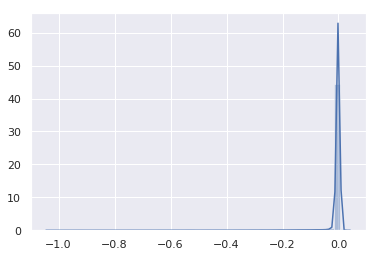

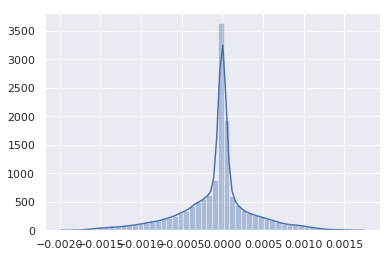

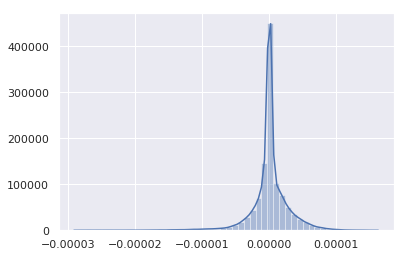

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

plt.figure()
sns.distplot(components_img1[1,:]);

plt.figure()
sns.distplot(components_img2[1,:])

plt.figure()
sns.distplot(components_img3[1,:])

In [14]:
from scipy.stats import scoreatpercentile
def flip(row):
    if np.sum(row > 0) < np.sum(row < 0):
        row *= -1

def thresholding(array):    
    thr=[]
    array1=array
    
    for idx,row in enumerate(array):
        row=flip(row)  
        row[row < 0] = 0
        T=np.amax(row)*0.9
        row[np.abs(row) < T] = 0
        
#         T=scoreatpercentile(np.abs(row),P)
#         T=2.3                
#         T=max(row)*0.2
        
        row=row/np.std(row)

        
        array1[idx,:]=row
#         thr.append(T)
    return array1
       
# from scipy import stats
# components_img1=stats.zscore(components_img1,axis=0)
# components_img2=stats.zscore(components_img2,axis=0)
# components_img3=stats.zscore(components_img3,axis=0)

thresholding(components_img1)    
thresholding(components_img2)
thresholding(components_img3)



TypeError: unorderable types: NoneType() < int()

In [ ]:
plt.figure()
sns.distplot(components_img1[1,:]);

plt.figure()
sns.distplot(components_img2[1,:])

plt.figure()
sns.distplot(components_img3[1,:])

In [7]:
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()

from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from pylab import figure
import os

def save_maps(components_img,dir):        
    if not os.path.exists(dir):
        os.makedirs(dir)
    components_img = masker.inverse_transform(components_img)
    for i, cur_img in enumerate(iter_img(components_img)):
        outname=dir+str(i)+'.png'
        plot_stat_map(cur_img, display_mode="z", title="ICN %d" % i,
                      cut_coords=1, colorbar=False,output_file=outname)
        if i==5:
            break

save_maps(components_img1,dir='/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_W1/')        
save_maps(components_img2,dir='/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_W2/')   
save_maps(components_img3,dir='/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_W3/')   

/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.5/dist-packages/scipy/ndimage/mea

In [ ]:
# np.save('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map1.npy',components_img1)
# np.save('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map2.npy',components_img2)
# np.save('/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_map3.npy',components_img3)